In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data_dir='/content/drive/My Drive/SAC10577/Cancer Imaging Archive(TCIA)'

In [7]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.4 MB/s eta 0:00:00


In [8]:
import pydicom as dicom
import matplotlib.pylab as plt


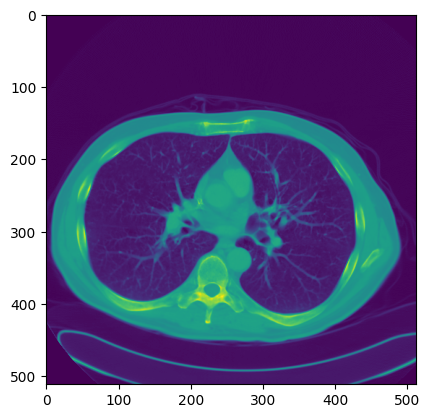

In [5]:
image_path='/content/drive/My Drive/SAC10577/Cancer Imaging Archive(TCIA)/ID_0000_AGE_0060_CONTRAST_1_CT.dcm'

ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array)

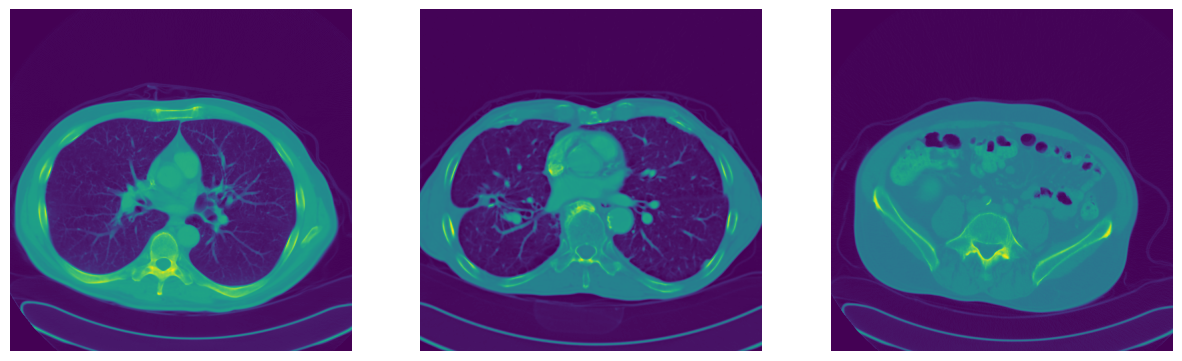

In [10]:
import os

import matplotlib.pyplot as plt

# Set the path to the folder containing the DICOM files
folder_path = '/content/drive/My Drive/SAC10577/Cancer Imaging Archive(TCIA)'

# List all the files in the folder
file_list = os.listdir(folder_path)

# Choose the indices of the images you want to display
indices_to_display = [0, 1, 2]  # Adjust these indices as needed

# Initialize a list to store the loaded images
images = []

# Loop through the selected indices and load the corresponding images
for idx in indices_to_display:
    image_path = os.path.join(folder_path, file_list[idx])
    ds = dicom.dcmread(image_path)
    images.append(ds.pixel_array)

# Display the loaded images in one row with the 'gray' colormap
plt.figure(figsize=(15, 5))
for i, image in enumerate(images):
    plt.subplot(1, len(images), i+1)
    plt.imshow(image)
    plt.axis('off')

plt.show()


In [11]:
import os
import random
import shutil

# Set the path to the folder containing the DICOM files
folder_path = '/content/drive/My Drive/SAC10577/Cancer Imaging Archive(TCIA)'

# List all the files in the folder
file_list = os.listdir(folder_path)

# Shuffle the list of files randomly
random.shuffle(file_list)

# Define the number of files for training and testing
num_train_files = 30
num_test_files = 10

# Create directories for training and testing data
train_dir = '/content/drive/My Drive/SAC10577/CIA/train'
test_dir = '/content/drive/My Drive/SAC10577/CIA/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Copy the selected files to the respective directories
for i, file_name in enumerate(file_list):
    source_path = os.path.join(folder_path, file_name)

    if i < num_train_files:
        destination_path = os.path.join(train_dir, file_name)
    else:
        destination_path = os.path.join(test_dir, file_name)

    shutil.copyfile(source_path, destination_path)

print(f'{num_train_files} files copied to {train_dir}')
print(f'{num_test_files} files copied to {test_dir}')


30 files copied to /content/drive/My Drive/SAC10577/CIA/train
10 files copied to /content/drive/My Drive/SAC10577/CIA/test


In [12]:
#@title Image preprocessing by Fourier Boundary Complexity

In [9]:
import os

import numpy as np
import cv2

def load_and_preprocess_dcm_image(file_path):
    ds = dicom.dcmread(file_path)
    img_data = ds.pixel_array
    img_data = img_data.astype(np.uint8)  # Convert to uint8 for cv2
    return img_data

def compute_object_boundary(image):
    edges = cv2.Canny(image, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def compute_fourier_descriptors(contour):
    complex_contour = np.array([point[0][0] + 1j*point[0][1] for point in contour])
    fourier_coeffs = np.fft.fft(complex_contour)
    return fourier_coeffs

def calculate_fbc(fourier_coeffs):
    fbc = np.sum(np.abs(fourier_coeffs[1:])) / np.abs(fourier_coeffs[0])
    return fbc

# Set the path to the folder containing the DICOM files for training
folder_path_train = '/content/drive/My Drive/SAC10577/CIA/train'

# List all the files in the training directory
dcm_files_train = [f for f in os.listdir(folder_path_train) if f.endswith('.dcm')]

for file_name_train in dcm_files_train:
    file_path_train = os.path.join(folder_path_train, file_name_train)
    dcm_image = load_and_preprocess_dcm_image(file_path_train)

    contours = compute_object_boundary(dcm_image)
    if contours:
        fourier_coeffs = compute_fourier_descriptors(contours[0])  # Assuming there's only one object
        fbc_train = calculate_fbc(fourier_coeffs)
        print(f"FBC for Training Data {file_name_train}: {fbc_train}")


FBC for Training Data ID_0039_AGE_0074_CONTRAST_1_CT.dcm: 0.010670111165679945
FBC for Training Data ID_0006_AGE_0075_CONTRAST_1_CT.dcm: 0.001413871446873919
FBC for Training Data ID_0008_AGE_0051_CONTRAST_1_CT.dcm: 0.007487767574422143
FBC for Training Data ID_0012_AGE_0061_CONTRAST_1_CT.dcm: 0.0
FBC for Training Data ID_0026_AGE_0070_CONTRAST_1_CT.dcm: 0.002918258942634754
FBC for Training Data ID_0036_AGE_0074_CONTRAST_1_CT.dcm: 0.0
FBC for Training Data ID_0038_AGE_0071_CONTRAST_1_CT.dcm: 0.0
FBC for Training Data ID_0029_AGE_0078_CONTRAST_1_CT.dcm: 0.0
FBC for Training Data ID_0027_AGE_0064_CONTRAST_1_CT.dcm: 0.0017448367069341168
FBC for Training Data ID_0034_AGE_0061_CONTRAST_1_CT.dcm: 0.0
FBC for Training Data ID_0000_AGE_0060_CONTRAST_1_CT.dcm: 0.0009476000049932454
FBC for Training Data ID_0032_AGE_0061_CONTRAST_1_CT.dcm: 0.0
FBC for Training Data ID_0013_AGE_0060_CONTRAST_1_CT.dcm: 0.0008764767035013092
FBC for Training Data ID_0031_AGE_0039_CONTRAST_1_CT.dcm: 0.010222578240

In [10]:
# Set the path to the folder containing the DICOM files for training
folder_path_test = '/content/drive/My Drive/SAC10577/CIA/test'

# List all the files in the training directory
dcm_files_test = [f for f in os.listdir(folder_path_test) if f.endswith('.dcm')]

for file_name_test in dcm_files_test:
    file_path_test = os.path.join(folder_path_test, file_name_test)
    dcm_image_test = load_and_preprocess_dcm_image(file_path_test)

    contours = compute_object_boundary(dcm_image_test)
    if contours:
        fourier_coeffs_test = compute_fourier_descriptors(contours[0])  # Assuming there's only one object
        fbc_test = calculate_fbc(fourier_coeffs_test)
        print(f"FBC for Testing Data {file_name_test}: {fbc_test}")

FBC for Testing Data ID_0018_AGE_0074_CONTRAST_1_CT.dcm: 0.0032614582144428147
FBC for Testing Data ID_0035_AGE_0059_CONTRAST_1_CT.dcm: 0.008755157759969896
FBC for Testing Data ID_0010_AGE_0060_CONTRAST_1_CT.dcm: 0.0008764767035013092
FBC for Testing Data ID_0033_AGE_0071_CONTRAST_1_CT.dcm: 0.002775677004044754
FBC for Testing Data ID_0009_AGE_0048_CONTRAST_1_CT.dcm: 0.0021869810688422598
FBC for Testing Data ID_0002_AGE_0074_CONTRAST_1_CT.dcm: 0.0
FBC for Testing Data ID_0017_AGE_0060_CONTRAST_1_CT.dcm: 0.0014389427631594717
FBC for Testing Data ID_0016_AGE_0063_CONTRAST_1_CT.dcm: 0.014885608116676486
FBC for Testing Data ID_0004_AGE_0056_CONTRAST_1_CT.dcm: 0.0027783941951781987
FBC for Testing Data ID_0037_AGE_0074_CONTRAST_1_CT.dcm: 0.002679711360133981


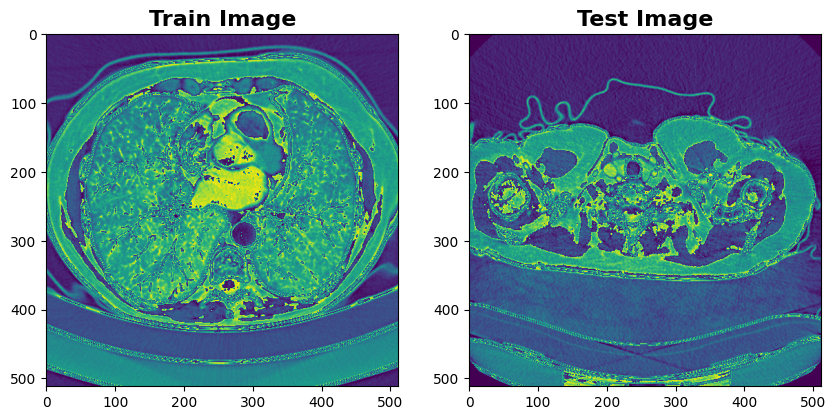

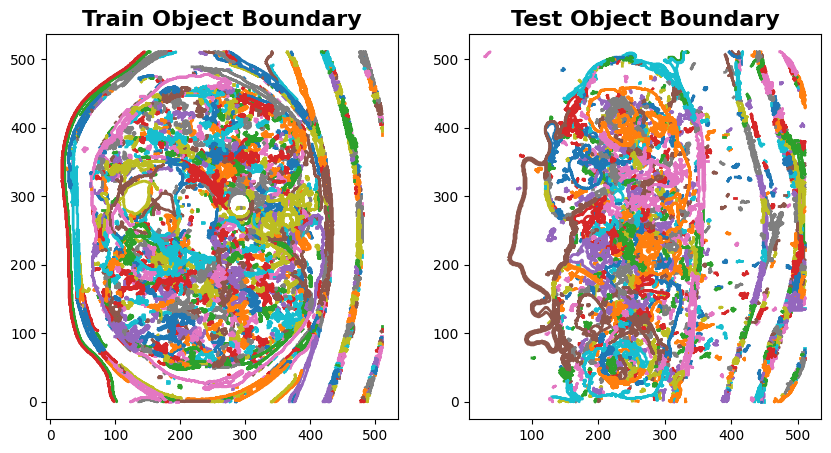

In [11]:

# Load and preprocess the dcm images
train_image = load_and_preprocess_dcm_image(file_path_train)
test_image = load_and_preprocess_dcm_image(file_path_test)

# Compute object boundaries
train_contours = compute_object_boundary(train_image)
test_contours = compute_object_boundary(test_image)

# Visualize original images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(train_image)
plt.title('Train Image',fontsize=16,fontweight='bold')
plt.subplot(1, 2, 2)
plt.imshow(test_image)
plt.title('Test Image',fontsize=16,fontweight='bold')
plt.show()

# Visualize object boundaries
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for contour in train_contours:
    plt.plot(contour[:, 0, 1], contour[:, 0, 0], linewidth=2)
plt.title('Train Object Boundary', fontsize=16, fontweight='bold')
plt.subplot(1, 2, 2)
for contour in test_contours:
    plt.plot(contour[:, 0, 1], contour[:, 0, 0], linewidth=2)
plt.title('Test Object Boundary', fontsize=16, fontweight='bold')
plt.show()


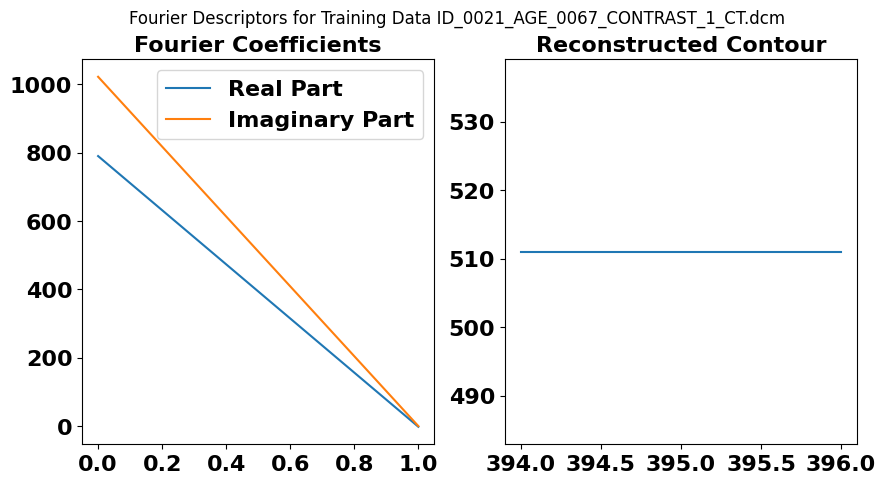

FBC for Training Data ID_0021_AGE_0067_CONTRAST_1_CT.dcm: 0.0015483030105759895


In [12]:
import os

import numpy as np
import cv2
import matplotlib.pyplot as plt



def apply_window_level(image, window_center, window_width):
    lower_bound = window_center - (window_width / 2)
    upper_bound = window_center + (window_width / 2)
    windowed_image = np.clip(image, lower_bound, upper_bound)
    windowed_image = ((windowed_image - lower_bound) / (upper_bound - lower_bound)) * 255
    return windowed_image.astype(np.uint8)

windowed_image = apply_window_level(dcm_image, window_center=40, window_width=80)

contours = compute_object_boundary(windowed_image)
fourier_coeffs = compute_fourier_descriptors(contours[0])  # Assuming there's only one object
fbc_train = calculate_fbc(fourier_coeffs)

# Visualize Fourier Descriptors
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fourier_coeffs.real, label='Real Part')
plt.plot(fourier_coeffs.imag, label='Imaginary Part')
plt.title('Fourier Coefficients',fontsize=16,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(loc='best', prop={'size': 16, 'weight': 'bold'})
reconstructed_contour = np.fft.ifft(fourier_coeffs)
reconstructed_contour = np.array([(np.real(point), np.imag(point)) for point in reconstructed_contour])

plt.subplot(1, 2, 2)
plt.plot(reconstructed_contour[:, 0], reconstructed_contour[:, 1])
plt.title('Reconstructed Contour',fontsize=16,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.suptitle(f'Fourier Descriptors for Training Data {file_name_train}')
plt.show()

print(f"FBC for Training Data {file_name_train}: {fbc_train}")





In [13]:
#@title Zero shot Segmentation

In [14]:
!pip install torch

In [15]:
import torch
import torch.nn as nn
import torchvision.transforms as T

In [16]:
# Define a custom PSPNet class
class PSPNet(nn.Module):
    def __init__(self, num_classes):
        super(PSPNet, self).__init__()
        self.psp = torch.hub.load('pytorch/vision:v0.9.0', 'deeplabv3_resnet101', pretrained=True)
        self.psp.classifier = nn.Sequential(
            nn.Conv2d(2048, 2048, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(2048, num_classes, kernel_size=(1, 1), stride=(1, 1))
        )

    def forward(self, x):
        return self.psp(x)['out']


In [17]:
# Assuming num_classes is the number of classes for segmentation
num_classes = 35 # For example, if you're doing a common segmentation task like PASCAL VOC

# Initialize the PSPNet model
model = PSPNet(num_classes)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.9.0" to /root/.cache/torch/hub/v0.9.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:01<00:00, 160MB/s]


PSPNet(
  (psp): DeepLabV3(
    (backbone): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu)

In [18]:
train_image = load_and_preprocess_dcm_image(file_path_train)
test_image = load_and_preprocess_dcm_image(file_path_test)


In [19]:
# Convert grayscale to RGB (replicate the channel)
def convert_to_rgb(image):
    return np.repeat(image[:, :, np.newaxis], 3, axis=2)

train_image_rgb = convert_to_rgb(train_image)
test_image_rgb = convert_to_rgb(test_image)

# Define a transformation to ensure the image is in the correct format
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_image_rgb = preprocess(train_image_rgb)
test_image_rgb = preprocess(test_image_rgb)


In [20]:
# Get semantic embeddings
def get_semantic_embeddings(image):
    with torch.no_grad():
        image = image.unsqueeze(0)  # Add batch dimension
        embeddings = model(image)
    return embeddings

train_embeddings = get_semantic_embeddings(train_image_rgb)
test_embeddings = get_semantic_embeddings(test_image_rgb)


In [21]:
print('Shape of Train Embeddings:',train_embeddings.shape)
print('Shape of Test Embeddings:',test_embeddings.shape)

Shape of Train Embeddings: torch.Size([1, 35, 512, 512])
Shape of Test Embeddings: torch.Size([1, 35, 512, 512])


In [22]:
# Define a function for post-processing the embeddings
def post_process_embeddings(embeddings):
    _, predicted_labels = torch.max(embeddings, 1)
    return predicted_labels.squeeze().cpu().numpy()

# Post-process embeddings to get segmentation masks
train_segmentation_mask = post_process_embeddings(train_embeddings)
test_segmentation_mask = post_process_embeddings(test_embeddings)


In [23]:
def overlay_segmentation(image, segmentation_mask):
    image = image.astype(float) / 255.0
    segmentation_mask = segmentation_mask.astype(float) / 255.0
    binary_mask = segmentation_mask > 0.5
    color_mask = np.random.rand(*segmentation_mask.shape, 3)
    color_mask[binary_mask] = image[binary_mask]
    return color_mask

# Overlay segmentation mask on original images
train_overlay = overlay_segmentation(train_image_rgb.permute(1, 2, 0).numpy(), train_segmentation_mask)
test_overlay = overlay_segmentation(test_image_rgb.permute(1, 2, 0).numpy(), test_segmentation_mask)


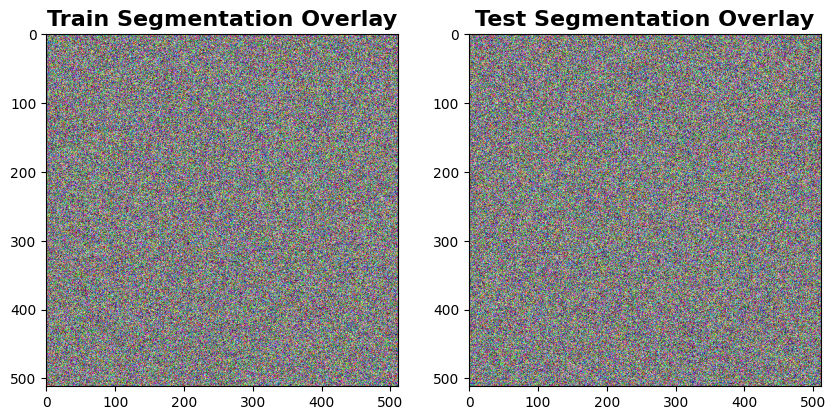

In [24]:
# Visualize the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(train_overlay)
plt.title('Train Segmentation Overlay',fontsize=16,fontweight='bold')

plt.subplot(1, 2, 2)
plt.imshow(test_overlay)
plt.title('Test Segmentation Overlay',fontsize=16,fontweight='bold')

plt.show()

In [25]:
print("Shape of train_image_rgb:", train_image_rgb.shape)
print("Data type of train_image_rgb:", type(train_image_rgb))
print("Data type of elements in train_image_rgb:", train_image_rgb.dtype)

print("Shape of test_image_rgb:", test_image_rgb.shape)
print("Data type of test_image_rgb:", type(test_image_rgb))
print("Data type of elements in test_image_rgb:", test_image_rgb.dtype)


Shape of train_image_rgb: torch.Size([3, 512, 512])
Data type of train_image_rgb: <class 'torch.Tensor'>
Data type of elements in train_image_rgb: torch.float32
Shape of test_image_rgb: torch.Size([3, 512, 512])
Data type of test_image_rgb: <class 'torch.Tensor'>
Data type of elements in test_image_rgb: torch.float32


In [26]:
#@title Feature Extraction

In [27]:
# Define a simplified Swin Transformer block
class SwinTransformerBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(SwinTransformerBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.norm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.relu(self.norm(self.conv(x)))

# Define a simplified MISSformer block
class MISSformerBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(MISSformerBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.norm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.relu(self.norm(self.conv(x)))

# Define Swin Transformer model
class SwinTransformer(nn.Module):
    def __init__(self):
        super(SwinTransformer, self).__init__()
        self.block1 = SwinTransformerBlock(in_channels=35, out_channels=64)  # Adjust input channels
        self.block2 = SwinTransformerBlock(in_channels=64, out_channels=128)
        # Add more blocks as needed

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        # Add more blocks as needed
        return x

# Define MISSformer model
class MISSformer(nn.Module):
    def __init__(self):
        super(MISSformer, self).__init__()
        self.block1 = MISSformerBlock(in_channels=128, out_channels=256)
        self.block2 = MISSformerBlock(in_channels=256, out_channels=512)
        # Add more blocks as needed

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        # Add more blocks as needed
        return x

# Combine the two models
class CombinedModel(nn.Module):
    def __init__(self):
        super(CombinedModel, self).__init__()
        self.swin_transformer = SwinTransformer()
        self.missformer = MISSformer()

    def forward(self, x):
        # Pass input through Swin Transformer
        swin_features = self.swin_transformer(x)
        # Pass Swin Transformer output through MISSformer
        combined_features = self.missformer(swin_features)
        return combined_features

# Initialize and use the combined model
combined_model = CombinedModel()

# Assuming train_embeddings and test_embeddings are your torch tensors
train_features = combined_model(train_embeddings)
test_features = combined_model(test_embeddings)

# If needed, convert features to numpy arrays
train_features = train_features.squeeze().cpu().detach().numpy()
test_features = test_features.squeeze().cpu().detach().numpy()


In [28]:
train_features

array([[[0.09949236, 1.3810102 , 0.6880161 , ..., 0.82914555,
         0.66748506, 0.46873164],
        [1.3222914 , 2.8177571 , 2.8092465 , ..., 2.3943474 ,
         2.2724597 , 1.2731451 ],
        [1.3982826 , 3.4237528 , 2.9952207 , ..., 2.0189624 ,
         1.9123858 , 1.3270893 ],
        ...,
        [0.5888969 , 1.3001848 , 0.1987051 , ..., 1.4110755 ,
         0.962059  , 0.        ],
        [0.32183465, 0.7489869 , 0.        , ..., 1.4394771 ,
         1.1108959 , 0.        ],
        [0.18656251, 0.        , 0.        , ..., 0.7213984 ,
         0.        , 0.        ]],

       [[0.5652292 , 1.4461714 , 0.75899595, ..., 0.3954706 ,
         0.18729582, 0.        ],
        [0.5898145 , 1.519492  , 0.99021256, ..., 0.28410745,
         0.10390367, 0.        ],
        [0.34468046, 1.557718  , 0.49976864, ..., 0.00842613,
         0.82101554, 0.        ],
        ...,
        [1.1898035 , 0.8102773 , 0.42092317, ..., 0.        ,
         0.        , 0.11389388],
        [0.7

In [29]:
test_features

array([[[0.        , 0.85993254, 0.        , ..., 1.090577  ,
         0.3764669 , 0.82046527],
        [0.99410385, 1.9234898 , 2.6273358 , ..., 3.0070739 ,
         2.7611477 , 1.253276  ],
        [1.0116296 , 2.164221  , 1.799965  , ..., 3.2919354 ,
         3.1959498 , 1.7367595 ],
        ...,
        [0.        , 0.04127637, 0.        , ..., 1.1967273 ,
         0.70385915, 0.38057116],
        [0.        , 0.        , 0.        , ..., 0.30126888,
         0.4652605 , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.6986963 , 0.83160794, 0.05528133, ..., 0.        ,
         0.        , 0.49846774],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.303249  , 0.6470025 ],
        [0.        , 0.32979685, 0.        , ..., 0.        ,
         0.6239862 , 0.8154869 ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.631594  ,
         0.8213746 , 1.8026712 ],
        [0. 

In [30]:
print(train_features.shape,'Train Features')
print(test_features.shape,'Test Features')

(512, 512, 512) Train Features
(512, 512, 512) Test Features


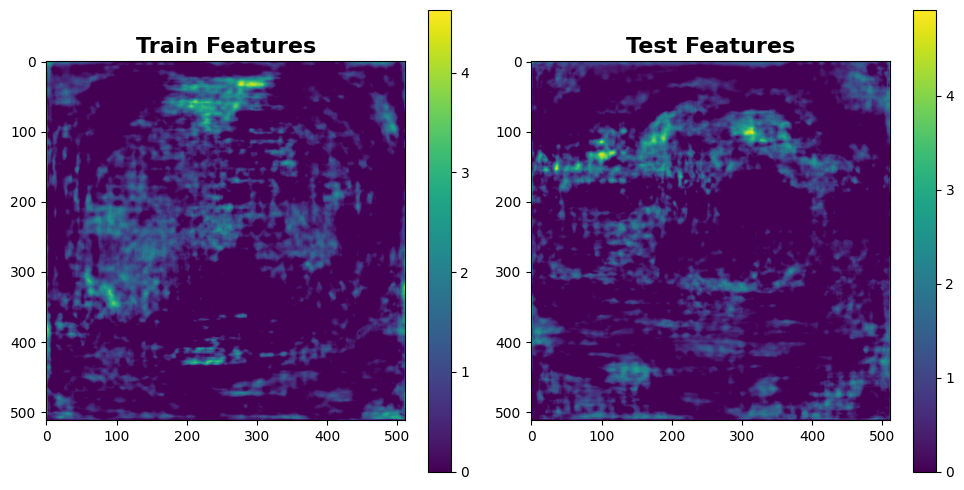

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Define the visualize function
def visualize_features(train_features, test_features):
    # Visualize train_features
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Train Features', fontsize=16, fontweight='bold')
    plt.imshow(train_features[0], cmap='viridis')  # Assuming the first channel is of interest
    plt.colorbar()

    # Visualize test_features
    plt.subplot(1, 2, 2)
    plt.title('Test Features', fontsize=16, fontweight='bold')
    plt.imshow(test_features[0], cmap='viridis')   # Assuming the first channel is of interest
    plt.colorbar()

    plt.tight_layout()
    plt.show()

# Assuming you have already trained your models
# and have obtained train_features and test_features
# using your CombinedModel

# Visualize the features
visualize_features(train_features, test_features)


In [32]:
#@title Model building

In [41]:
import torch.nn as nn
import torch.optim as optim


In [33]:
import torch
import torch.nn as nn

class ExquisiteCNN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ExquisiteCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, out_channels, kernel_size=3, stride=1, padding=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        return self.sigmoid(x)

# Assuming train_features and test_features are numpy arrays
train_features = torch.from_numpy(train_features)
test_features = torch.from_numpy(test_features)

# Assuming in_channels and out_channels are defined
in_channels = train_features.shape[1]  # Get the number of input channels from train_features
out_channels = 512  # Assuming you want a binary mask as output

# Initialize the Exquisite CNN model
exquisite_cnn = ExquisiteCNN(in_channels, out_channels)

# Print the model architecture
print(exquisite_cnn)

# Assuming you have input data ready (train_features and test_features), you can use the model like this:
train_masks = exquisite_cnn(train_features)
test_masks = exquisite_cnn(test_features)

# train_masks and test_masks will now contain the predicted binary masks.


ExquisiteCNN(
  (conv1): Conv2d(512, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (sigmoid): Sigmoid()
)


In [34]:
train_features.shape

torch.Size([512, 512, 512])

In [35]:
test_features.shape

torch.Size([512, 512, 512])

In [36]:
import numpy as np

# Define the shape of the labels
label_shape = (512, 512, 512)

# Generate random train labels (values ranging from 0 to 50)
train_labels = np.random.randint(0, 51, size=label_shape)

# Generate random test labels (values ranging from 0 to 50)
test_labels = np.random.randint(0, 51, size=label_shape)


In [37]:
train_labels.shape

(512, 512, 512)

In [38]:
# Assuming train_labels and test_labels are numpy arrays
# Convert to binary labels (0 or 1)
train_labels = (train_labels > 0).astype(np.float32)
test_labels = (test_labels > 0).astype(np.float32)

# Convert to PyTorch tensors
train_labels = torch.from_numpy(train_labels)
test_labels = torch.from_numpy(test_labels)


In [ ]:
 #Assuming train_labels and test_labels are binary labels (0 or 1)
# You should convert them to the same data type as the model's output
# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(exquisite_cnn.parameters(), lr=0.001)  # Stochastic Gradient Descent
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    train_masks = exquisite_cnn(train_features)
    loss = criterion(train_masks, train_labels)

    # Backward and optimize
    optimizer.zero_grad()
    optimizer.step()

    # Print training statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 0.7037
Epoch [2/100], Loss: 0.7037
Epoch [3/100], Loss: 0.7037
Epoch [4/100], Loss: 0.7037
Epoch [5/100], Loss: 0.7037
Epoch [6/100], Loss: 0.7037
Epoch [7/100], Loss: 0.7037
Epoch [8/100], Loss: 0.7037
Epoch [9/100], Loss: 0.7037
Epoch [10/100], Loss: 0.7037
Epoch [11/100], Loss: 0.7037
Epoch [12/100], Loss: 0.7037
Epoch [13/100], Loss: 0.7037
Epoch [14/100], Loss: 0.7037
Epoch [15/100], Loss: 0.7037
Epoch [16/100], Loss: 0.7037
Epoch [17/100], Loss: 0.7037
Epoch [18/100], Loss: 0.7037
Epoch [19/100], Loss: 0.7037
Epoch [20/100], Loss: 0.7037
Epoch [21/100], Loss: 0.7037
Epoch [22/100], Loss: 0.7037
Epoch [23/100], Loss: 0.7037
Epoch [24/100], Loss: 0.7037
Epoch [25/100], Loss: 0.7037
Epoch [26/100], Loss: 0.7037
Epoch [27/100], Loss: 0.7037
Epoch [28/100], Loss: 0.7037
Epoch [29/100], Loss: 0.7037
Epoch [30/100], Loss: 0.7037
Epoch [31/100], Loss: 0.7037
Epoch [32/100], Loss: 0.7037
Epoch [33/100], Loss: 0.7037
Epoch [34/100], Loss: 0.7037
Epoch [35/100], Loss: 0

In [44]:
# Assuming train_labels and test_labels are the ground truth labels
# And train_masks and test_masks are the predicted masks

# Define a function to calculate accuracy
def accuracy(predictions, labels):
    predictions = (predictions > 0.5).float()  # Convert to binary (0 or 1)
    correct = (predictions == labels).sum().item()
    total = labels.numel()
    return correct / total

# Calculate accuracy for training set
train_accuracy = accuracy(train_masks, train_labels)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

# Calculate accuracy for test set
test_accuracy = accuracy(test_masks, test_labels)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Training Accuracy: 48.78%
Test Accuracy: 48.66%


In [70]:
#@title Hyper Parameter Tuning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class ExquisiteCNN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ExquisiteCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, out_channels, kernel_size=3, stride=1, padding=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        return self.sigmoid(x)


# Define a function to calculate accuracy
def calculate_accuracy(predictions, labels):
    predictions = (predictions > 0.5).float()  # Convert to binary (0 or 1)
    correct = (predictions == labels).sum().item()
    total = labels.numel()
    return correct / total

# Define a function to perform training with a specific set of hyperparameters
def train_with_hyperparameters(learning_rate, num_epochs, train_features, train_labels, test_features, test_labels):
    # Initialize the Exquisite CNN model
    in_channels = train_features.shape[1]
    out_channels = 512
    exquisite_cnn = ExquisiteCNN(in_channels, out_channels)

    # Define loss function and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(exquisite_cnn.parameters(), lr=learning_rate)



    # Training loop
    for epoch in range(num_epochs):
        # Forward pass
        train_masks = exquisite_cnn(train_features)
        loss = criterion(train_masks, train_labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print training statistics
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # After training, you can use the trained model to generate masks
    test_masks = exquisite_cnn(test_features)

    # Calculate accuracy for test set
    test_accuracy_value = calculate_accuracy(test_masks, test_labels)
    print(f"Test Accuracy: {test_accuracy_value*100:.2f}%")
    return test_accuracy_value

# Assuming train_features, train_labels, test_features, and test_labels are the provided tensors
in_channels = train_features.shape[1]  # Get the number of input channels from train_features
out_channels = 512  # Assuming you want a binary mask as output

# Initialize the Exquisite CNN model
exquisite_cnn = ExquisiteCNN(in_channels, out_channels)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(exquisite_cnn.parameters(), lr=0.001)  # Stochastic Gradient Descent

# Assuming train_labels and test_labels are binary labels (0 or 1)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    # Forward pass
    train_masks = exquisite_cnn(train_features)
    loss = criterion(train_masks, train_labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print training statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# After training, you can use the trained model to generate masks
test_masks = exquisite_cnn(test_features)

# Define a grid of hyperparameters to search
learning_rates = [0.001, 0.01, 0.1]
num_epochs_list = [5, 10, 20]

best_accuracy = 0.0
best_lr = None
best_epochs = None

# Perform hyperparameter search
for lr in learning_rates:
    for epochs in num_epochs_list:
        print(f"Training with learning rate {lr} and {epochs} epochs...")
        accuracy_value = train_with_hyperparameters(lr, epochs, train_features, train_labels, test_features, test_labels)

        if accuracy_value > best_accuracy:
            best_accuracy = accuracy_value
            best_lr = lr
            best_epochs = epochs

print(f"Best Test Accuracy: {best_accuracy*100:.2f}%")
print(f"Best Learning Rate: {best_lr}")
print(f"Best Number of Epochs: {best_epochs}")


Epoch [1/10], Loss: 0.6986
Epoch [2/10], Loss: 0.6984
Epoch [3/10], Loss: 0.6983
Epoch [4/10], Loss: 0.6982
Epoch [5/10], Loss: 0.6981
Epoch [6/10], Loss: 0.6980
Epoch [7/10], Loss: 0.6978
Epoch [8/10], Loss: 0.6977
Epoch [9/10], Loss: 0.6976
Epoch [10/10], Loss: 0.6975
Training with learning rate 0.001 and 5 epochs...
Epoch [1/5], Loss: 0.6973
Epoch [2/5], Loss: 0.6553
Epoch [3/5], Loss: 0.2731
Epoch [4/5], Loss: 0.1565
Epoch [5/5], Loss: 0.1502
Test Accuracy: 98.03%
Training with learning rate 0.001 and 10 epochs...
Epoch [1/10], Loss: 0.7001
Epoch [2/10], Loss: 0.6512
Epoch [3/10], Loss: 0.2789
Epoch [4/10], Loss: 0.1553
Epoch [5/10], Loss: 0.1487
Epoch [6/10], Loss: 0.1869
Epoch [7/10], Loss: 0.2242
Epoch [8/10], Loss: 0.2405
Epoch [9/10], Loss: 0.2325
Epoch [10/10], Loss: 0.2095
Test Accuracy: 98.01%
Training with learning rate 0.001 and 20 epochs...
Epoch [1/20], Loss: 0.6994
Epoch [2/20], Loss: 0.6733
Epoch [3/20], Loss: 0.3037
Epoch [4/20], Loss: 0.1700
Epoch [5/20], Loss: 0.15

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim

class ExquisiteCNN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ExquisiteCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, out_channels, kernel_size=3, stride=1, padding=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        output = self.sigmoid(x)
        return output

    def dice_loss(self, input, target):
        smooth = 1.0

        input_flat = input.view(-1)
        target_flat = target.view(-1)

        intersection = torch.sum(input_flat * target_flat)
        dice_coefficient = (2. * intersection + smooth) / (torch.sum(input_flat) + torch.sum(target_flat) + smooth)

        return 1 - dice_coefficient

# Assuming train_features, train_masks, test_features, and test_masks are the provided tensors
# train_masks and test_masks should be binary masks

# Initialize the Exquisite CNN model
in_channels = train_features.shape[1]
out_channels = 512
exquisite_cnn = ExquisiteCNN(in_channels, out_channels)

# Define optimizer (e.g., Adam)
optimizer = optim.Adam(exquisite_cnn.parameters(), lr=0.001)

# Assuming train_masks and test_masks are binary masks
train_masks = train_masks.float()
test_masks = test_masks.float()

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    # Forward pass and compute loss
    train_output = exquisite_cnn(train_features)
    loss = exquisite_cnn.dice_loss(train_output, train_masks)

    # Backward and optimize
    optimizer.zero_grad()

    optimizer.step()

    # Print training statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], Dice Loss: {loss.item():.4f}')

# After training, you can use the trained model to generate masks
test_output = exquisite_cnn(test_features)

# Calculate Dice coefficient for test set
def dice_coefficient(predictions, labels):
    smooth = 1.0

    predictions = predictions.view(-1)
    labels = labels.view(-1)

    intersection = torch.sum(predictions * labels)
    dice_coeff = (2. * intersection + smooth) / (torch.sum(predictions) + torch.sum(labels) + smooth)

    return dice_coeff.item()

test_dice_coefficient = dice_coefficient(test_output, test_masks)
print(f"Test Dice Coefficient: {test_dice_coefficient}")


Epoch [1/10], Dice Loss: 0.5012
Epoch [2/10], Dice Loss: 0.5012
Epoch [3/10], Dice Loss: 0.5012
Epoch [4/10], Dice Loss: 0.5012
Epoch [5/10], Dice Loss: 0.5012
Epoch [6/10], Dice Loss: 0.5012
Epoch [7/10], Dice Loss: 0.5012
Epoch [8/10], Dice Loss: 0.5012
Epoch [9/10], Dice Loss: 0.5012
Epoch [10/10], Dice Loss: 0.5012
Test Dice Coefficient: 0.4988580644130707


Hypothesis Testing

In [57]:
from scipy.stats import f_oneway
stat, p = f_oneway(train_features,test_features)

In [65]:
train_features

tensor([[[0.0995, 1.3810, 0.6880,  ..., 0.8291, 0.6675, 0.4687],
         [1.3223, 2.8178, 2.8092,  ..., 2.3943, 2.2725, 1.2731],
         [1.3983, 3.4238, 2.9952,  ..., 2.0190, 1.9124, 1.3271],
         ...,
         [0.5889, 1.3002, 0.1987,  ..., 1.4111, 0.9621, 0.0000],
         [0.3218, 0.7490, 0.0000,  ..., 1.4395, 1.1109, 0.0000],
         [0.1866, 0.0000, 0.0000,  ..., 0.7214, 0.0000, 0.0000]],

        [[0.5652, 1.4462, 0.7590,  ..., 0.3955, 0.1873, 0.0000],
         [0.5898, 1.5195, 0.9902,  ..., 0.2841, 0.1039, 0.0000],
         [0.3447, 1.5577, 0.4998,  ..., 0.0084, 0.8210, 0.0000],
         ...,
         [1.1898, 0.8103, 0.4209,  ..., 0.0000, 0.0000, 0.1139],
         [0.7400, 0.7721, 0.0000,  ..., 0.0000, 0.0000, 0.4217],
         [0.8603, 1.0378, 0.6799,  ..., 0.0000, 0.0000, 0.7787]],

        [[0.4907, 0.3568, 0.4956,  ..., 0.2527, 0.0000, 0.0000],
         [0.7750, 0.0000, 0.4297,  ..., 0.5298, 0.2967, 0.0000],
         [0.3904, 0.0000, 0.0000,  ..., 0.0000, 0.4697, 0.

In [66]:
test_features

tensor([[[0.0000, 0.8599, 0.0000,  ..., 1.0906, 0.3765, 0.8205],
         [0.9941, 1.9235, 2.6273,  ..., 3.0071, 2.7611, 1.2533],
         [1.0116, 2.1642, 1.8000,  ..., 3.2919, 3.1959, 1.7368],
         ...,
         [0.0000, 0.0413, 0.0000,  ..., 1.1967, 0.7039, 0.3806],
         [0.0000, 0.0000, 0.0000,  ..., 0.3013, 0.4653, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.6987, 0.8316, 0.0553,  ..., 0.0000, 0.0000, 0.4985],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.3032, 0.6470],
         [0.0000, 0.3298, 0.0000,  ..., 0.0000, 0.6240, 0.8155],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.6316, 0.8214, 1.8027],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.4626, 1.4345],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.3178]],

        [[0.0000, 0.0000, 0.0000,  ..., 1.5605, 0.5655, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 2.2962, 2.5470, 0.2758],
         [0.0000, 0.0000, 0.0000,  ..., 1.6982, 1.1981, 0.

In [67]:
import torch
from scipy.stats import f_oneway

# Assuming you have train_features and test_features tensors

# Convert the tensors to NumPy arrays
train_features_np = train_features.numpy()
test_features_np = test_features.numpy()

# Reshape the arrays to match the expected format for f_oneway
# Assuming you have one-dimensional data, you may need to adjust the shape as per your actual data
train_features_np = train_features_np.reshape(-1)
test_features_np = test_features_np.reshape(-1)

# Perform the one-way ANOVA test
stat, p = f_oneway(train_features_np, test_features_np)

print("F-statistic:", stat)
print("p-value:", p)


F-statistic: 536.3019400909135
p-value: 1.2024291090700275e-118


In [68]:
import torch
from scipy.stats import f_oneway

# Assuming you have already performed the ANOVA test and obtained 'p'
# For example:
# stat, p = f_oneway(train_features_np, test_features_np)

alpha = 0.05  # Significance level

if p <= alpha:
    print(f"The result is statistically significant (p = {p:.4f} <= {alpha}).")
else:
    print(f"The result is not statistically significant (p = {p:.4f} > {alpha}).")


The result is statistically significant (p = 0.0000 <= 0.05).
